<div>
    <h3>Soal 1</h3>
    <p>Di berikan sebuah data: <br> 55,84,99,51,22,77,39,63,10,66</p>
    <ul>
        <li type="a">Lakukan bootstrap mean sebanyak 200 kali dan hitung berapa mean bootstrap yang
        didapatkan
        </li>
        <li type="a">Lakukan bootstrap varians sebanyak 200 kali dan hitung berapa varians bootstrap
        yang didapatkan
        </li>
        <li type="a">Lakukan jackknife mean dan hitung berapa mean jackknife yang didapatkan
        </li>
        <li type="a">Lakukan jackknife varians dan hitung berapa varians jackknife yang didapatkan
        </li>
        <li type="a">Hitung nilai rata-rata pada data tersebut
        </li>
        <li type="a">Hitung nilai Mean Squared Error (MSE) pada hasil poin “e” menggunakan bootstrap
            atau jackknife.
        </li>
        <li type="a">Buatlah selang kepercayaan 5% dengan bantuan bootstrap atau jackknife.
        </li>
    </ul>

</div>

<div>
    <h2>A.Lakukan bootstrap mean sebanyak 200 kali dan hitung berapa mean bootstrap yang
        didapatkan</h2>
</div>

In [1]:
from model import *
from numpy import mean,var
data=[55,84,99,51,22,77,39,63,10,66]

x,mean_bootstrap,_,mse_mean,_,=boostraping(data,rows=200,k=70,func=mean)

print('result for mean bootraping of mean',mean_bootstrap)



=======Start  Bootstarp=======
0.05884671211242676
========End Bootstarp=========
result for mean bootraping of mean 56.83192857142858


## B. Lakukan bootstrap varians sebanyak 200 kali dan hitung berapa varians bootstrap yang didapatkan

In [2]:
_,var_bootstrap,_,mse_variance,_,=boostraping(data,rows=200,k=70,func=var)
print('variance original is:',var(data))
print('result variance from bootraping of variance',var_bootstrap)


=======Start  Bootstarp=======
0.07883429527282715
========End Bootstarp=========
variance original is: 680.6400000000001
result variance from bootraping of variance 674.6380908163264


## C. Lakukan jackknife mean dan hitung berapa mean jackknife yang didapatkan

In [3]:
_,estimasi,var_resample,bias,_,conv_mean=jackknife_stat(data=data,func=mean,convince=0.95)
print('nilai rata-rata asli:',mean(data))
print('nilai rata-rata jacknife:',estimasi)
print('nilai bias jacknife:',bias)

nilai rata-rata asli: 56.6
nilai rata-rata jacknife: 56.6
nilai bias jacknife: 0.0


## D. Lakukan jackknife varians dan hitung berapa varians jackknife yang didapatkan

In [4]:
re_sample,estimasi,var_resample,bias,_,convince_var=jackknife_stat(data=data,func=var,convince=0.95) # satu arrah 1-0.05=0.95
print('nilai variance asli:',var(data))
print('nilai estimasi jacknife:',estimasi)
print('nilai bias jacknife:',bias)
print('variance jacknife',var_resample)



nilai variance asli: 680.6400000000001
nilai estimasi jacknife: 756.266666666668
nilai bias jacknife: -75.62666666666792
variance jacknife 680.64


# E. Hitung nilai rata-rata pada data tersebut

In [5]:
print('rata-rata asli:',mean(data))

rata-rata asli: 56.6


## F. Hitung nilai Mean Squared Error (MSE) pada hasil poin “e” menggunakan bootstrap atau jackknife.

In [6]:
from sklearn.metrics import mean_squared_error
print('MSE pada boostrap pada fungsi mean:',mse_mean)
print('MSE pada boostrap pada fungsi var:',mse_variance)
print('MSE pada jacknife pada fungsi mean:',conv_mean)
print('MSE pada jacknife pada fungsi var:',convince_var)

MSE pada boostrap pada fungsi mean: 2.603357142857143
MSE pada boostrap pada fungsi var: 72.37853367346939
MSE pada jacknife pada fungsi mean: [39.5554488 73.6445512]
MSE pada jacknife pada fungsi var: [ 213.46293826 1299.07039508]


## G.Buatlah selang kepercayaan 5% dengan bantuan bootstrap atau jackknife.

### bootstraping

In [7]:
dummy_1,mean_funct_resample,var_bootstraping,mse_mean_funct_resample,ci_resample=boostraping(data,200,70,mean)
print(ci_resample)

=======Start  Bootstarp=======
0.07141828536987305
========End Bootstarp=========
[50.54335182446199, 62.65664817553801]


### jackknife

In [8]:
re_sample,estimasi,mean_resample,bias,_,convince_mean=jackknife_stat(data=data,func=mean,convince=0.95) # satu arrah 1-0.05=0.95
print('nilai variance asli:',var(data))
print('nilai estimasi jacknife:',estimasi)
print('nilai bias jacknife:',bias)
print('variance jacknife pada',var_resample)
print('nilai CI adalah:',convince_var)



nilai variance asli: 680.6400000000001
nilai estimasi jacknife: 56.6
nilai bias jacknife: 0.0
variance jacknife pada 680.64
nilai CI adalah: [ 213.46293826 1299.07039508]


In [9]:
re_sample,estimasi,var_resample,bias,_,convince_var=jackknife_stat(data=data,func=var,convince=0.95) # satu arrah 1-0.05=0.95
print('nilai variance asli:',var(data))
print('nilai estimasi jacknife:',estimasi)
print('nilai bias jacknife:',bias)
print('variance jacknife',var_resample)
print('nilai CI adalah:',convince_var)



nilai variance asli: 680.6400000000001
nilai estimasi jacknife: 756.266666666668
nilai bias jacknife: -75.62666666666792
variance jacknife 680.64
nilai CI adalah: [ 213.46293826 1299.07039508]


2. a)

In [10]:
def uniform_generator(low=0,high=1,size=None):
    if size==None:
        return low+(high-low)*random()
    if size<0:
        raise ValueError('size not in real number on negative')
    memo=[]
    for i in range(size):
        result=low+(high-low)*random()
        memo.append(result)
    return (np.array(memo))  
np.corrcoef(uniform_generator(low=0,high=1,size=1000),np.random.uniform(size=1000))


array([[ 1.        , -0.01185611],
       [-0.01185611,  1.        ]])

2. b)

In [11]:
np.corrcoef((uniform_generator(low=0,high=1,size=1000)**2),np.random.uniform(size=1000))

array([[1.        , 0.04391672],
       [0.04391672, 1.        ]])

### 3. Misalkan 𝑈1 , 𝑈2 , … berdistribusi uniform(0,1). Kemudian diberikan 𝑁 = min{𝑛: ∑𝑛𝑖=1 𝑈𝑖 > 1} merupakan sebuah bilangan acak yang dijumlahkan dan berhenti ketika berjumlah lebih dari 1. Dengan menggunakan pemrograman, lakukan,

### a. mengunakan N =100

In [12]:
sample=random_uniform(size=100)
print('estimasi rata-rata sample:',mean(sample))
print('estimasi varian sample:',var(sample))


estimasi rata-rata sample: 0.5406329285184814
estimasi varian sample: 0.07300685215693568


b. menggunakan N=1000

In [13]:
sample=random_uniform(size=1000)
print('estimasi rata-rata sample:',mean(sample))
print('estimasi varian sample:',var(sample))

estimasi rata-rata sample: 0.5013994415923615
estimasi varian sample: 0.08462751023812326


4 a)

In [14]:
from numpy.random import uniform as _uniform
N=_uniform(size=1000)
def inverse(u):
    formula=pow(((12*u)/(2*u+3)),1/3)
    return formula


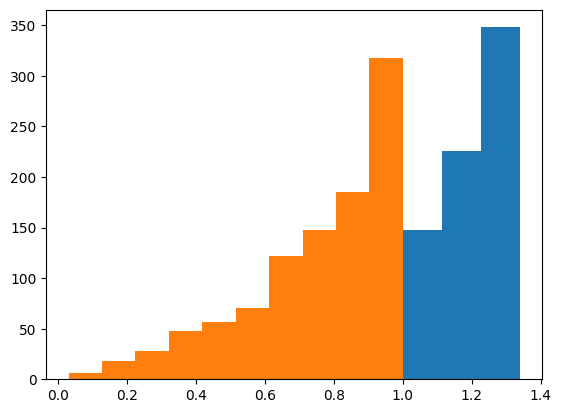

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(inverse(N))
plt.hist(np.random.uniform(N))
plt.show()

4 b

In [16]:
def p(x):
    return 0.5*((x**2)+x)
def accept_reject(N):
    xmin = -3
    xmax = 3
    pmax = 0.8

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < p(t)/ pmax:
            n_accept += 1
            x_list.append(t)
    return x_list

/tmp/ipykernel_4725/598428131.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accept_reject(10000))


<AxesSubplot: ylabel='Density'>

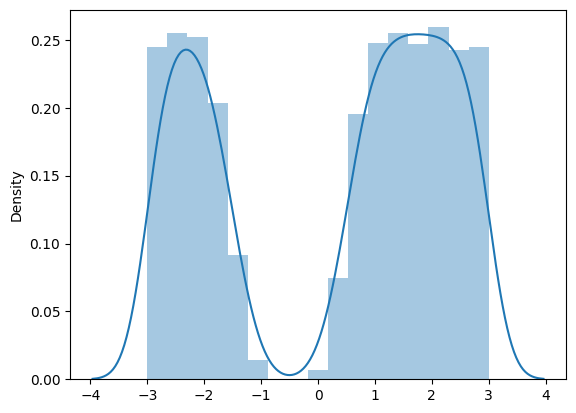

In [17]:
sns.distplot(accept_reject(10000))


5 a

/tmp/ipykernel_4725/3256433491.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(inverse(N))
/tmp/ipykernel_4725/3256433491.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.random.exponential(N))


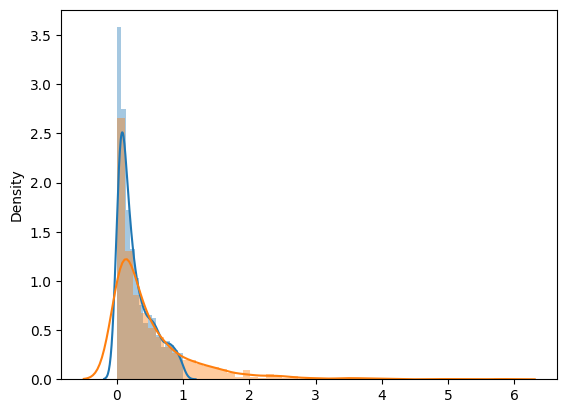

In [22]:
def inverse(data):
    formula=0.25*data+0.5*pow(data,4)+0.25*pow(data,5)
    return formula
sns.distplot(inverse(N))
sns.distplot(np.random.exponential(N))
plt.show()

In [19]:
def p(x):
    return 0.25+(x**3)+(x**4)

def accept_reject(N): # menggunakan metode https://rh8liuqy.github.io/Accept_reject.html
    xmin = -3
    xmax = 3
    pmax = 0.8

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < p(t)/ pmax:
            n_accept += 1
            x_list.append(t)
    return x_list

/tmp/ipykernel_4725/451898815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accept_reject(1000))


<AxesSubplot: ylabel='Density'>

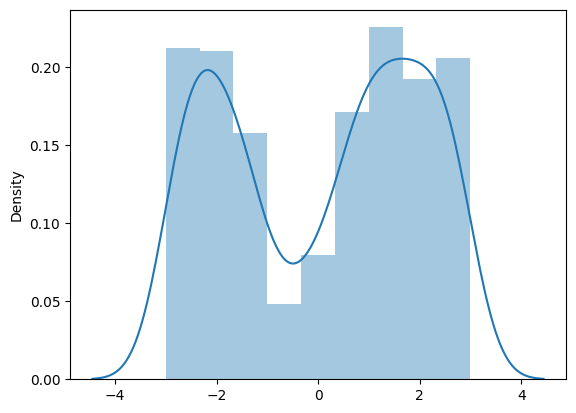

In [20]:
sns.distplot(accept_reject(1000))